“Ensemble” is a technique where multiple models are combined to improve the overall
performance of a system. The basic idea is that by combining the predictions of multiple models,
the strengths of individual models can compensate for each other's weaknesses, leading to more
accurate and robust predictions.
There are several types of ensemble methods, including:
1. Bagging (Bootstrap Aggregating):
This method involves training multiple instances of the same base learning algorithm on
different subsets of the training data (sampled with replacement) and then combining
their predictions. Random Forest is a popular example of a bagging ensemble algorithm.
2. Boosting:
Boosting algorithms iteratively train weak learners (models that are only slightly better
than random guessing) and give more weight to misclassified instances in subsequent
iterations, focusing on the areas where previous models performed poorly. Examples of
boosting algorithms include AdaBoost and Gradient Boosting Machines (GBM).
3. Stacking:
Stacking, also known as stacked generalization, involves training a meta-model (often a
simple model like linear regression) on the predictions of several base models. The meta-
model learns to combine the predictions of the base models to make the final prediction.

4. Voting:
In this, multiple models make predictions independently, and the final prediction is
determined by a majority vote (for classification tasks) or averaging (for regression tasks)
of the individual predictions.

In this lab, you will learn to perform sentiment analysis on a dataset of Airbnb’s dataset using
ensemble methods. You will explore techniques such as bagging, boosting, and stacking to
improve the accuracy of sentiment classification.

You have been given some sample codes, you are to use them and make your own code from
scratch to perform the following tasks:
1. Data Preprocessing:

• Load the dataset.

• Preprocess the text data by removing stopwords, punctuation, and performing
tokenization.

• Convert the text data into numerical features using techniques like TF-IDF or
CountVectorizer.

2. Model Training:

• Train individual base models using different algorithms such as Naive Bayes, Decision
Trees, and Support Vector Machines (SVM).

• Implement ensemble techniques:

o Bagging: Train a Random Forest classifier.

o Boosting: Train an AdaBoost classifier.

o Stacking: Train a meta-model using predictions from base models.

3. Model Evaluation:

• Evaluate the performance of each base model and ensemble methods using metrics such
as accuracy, precision, recall, and F1-score.

• Visualize the performance metrics using plots like confusion matrix and ROC curve.

4. Analysis:

• Compare the performance of individual models with ensemble methods.

• Discuss the strengths and weaknesses of each approach.

• Explore potential improvements or modifications to the ensemble methods.

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
data = pd.read_csv('Abnb_paris.csv')
data.head()

,Unnamed: 0,reviews,savwish,logreviews,logsavwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text
0,1,10,1277,1.041393,3.106531,185,4.5,3,1,5,3.208943,1,1,1,1,1,1,1,Even if i stayed at another apartment the stay...
1,2,8,279,0.954243,2.447158,100,5.0,2,0,3,2.245883,0,0,0,0,1,1,1,"Exactly what you can see on the pictures, plus..."
2,3,31,434,1.505150,2.638489,512,5.0,10,1,3,2.509137,1,0,1,1,4,3,5,We were five colleagues staying in Lea's apart...
3,4,65,784,1.819544,2.894870,92,4.5,2,0,2,2.864322,0,0,1,1,1,1,1,"It was perfect! The location is great, easy to..."
4,5,9,621,1.000000,2.793790,71,4.5,4,1,1,1.892305,1,1,0,0,2,1,1,"Saras flat is nice and clean, she was the perf..."


In [ ]:
pip install nltk


In [ ]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data['review_text'] = data['review_text'].astype(str)
data['review_text'] = data['review_text'].str.lower()
data['review_text'] = data['review_text'].str.translate(str.maketrans('', '', string.punctuation))
data['review_text'] = data['review_text'].apply(word_tokenize)
stop = stopwords.words('english')
data['review_text'] = data['review_text'].apply(lambda x: [item for item in x if item not in stop])
stemmer = PorterStemmer()
data['review_text'] = data['review_text'].apply(lambda x: [stemmer.stem(y) for y in x])
data['review_text'] = data['review_text'].apply(lambda x: ' '.join(x))

In [ ]:
columns = data.columns
print(columns)


Index(['Unnamed: 0', 'reviews', 'savwish', 'logreviews', 'logsavwish', 'price',
       'rating', 'accommodates', 'extpeop', 'min_stay', 'sentiment', 'secdep',
       'cleanfee', 'weekfee', 'monthfee', 'bedroom', 'bathroom', 'beds',
       'review_text'],
      dtype='object')


In [ ]:
mean_sentiment = data['sentiment'].mean()
print("Mean sentiment score:", mean_sentiment)


Mean sentiment score: 2.345700610772728


In [ ]:
unique_sentiments = data['sentiment'].unique()
print("Unique sentiments:", unique_sentiments)


Unique sentiments: [3.20894318 2.245883   2.5091372  2.86432218 1.89230498 1.97289466
 2.85275333 1.83493536 1.97480161 1.72117282 3.29043786 1.68841642
 2.33024976 2.41866416 4.14295728 2.80891703 1.38619579 1.37776712
 1.64524983 1.34869863 2.01115924 2.79762178 2.01875    2.7602665
 1.64676171 2.39445305 1.62364874 2.35589108 2.26192517 2.32097614
 1.4419243  2.62106447 3.537711   1.76349671 1.80923355 2.33736251
 2.72133378 2.21071222 1.96860461 2.78691043 2.87083545 0.81074132
 3.10743708 2.86239447 2.22085947 2.68652556 2.77192785 2.11803788
 3.34305105 1.87044299 1.71889023 1.74684573 2.66436528 3.16416029
 2.87656332 3.13709162 2.83147901 2.93217716 2.70336581 2.12726667
 1.7353747  2.91748921 2.11068997 2.88200197 1.37146725]


In [ ]:
total_sentiment = data['sentiment'].sum()
print("Total sentiment score:", total_sentiment)


Total sentiment score: 154.81624031100003


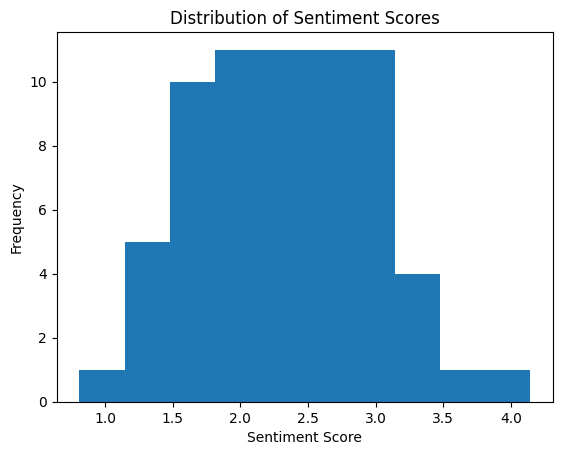

In [ ]:
import matplotlib.pyplot as plt
data['sentiment'].plot(kind='hist')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()


**Preprocessing**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = data.iloc[:, 1:]
columns_to_drop = ['logreviews', 'logsavwish']
data = data.drop(columns_to_drop, axis=1)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['review_text'])
data['sentiment'] = data['sentiment'].astype(int)
unique_sentiments = data['sentiment'].unique()
print("Unique sentiment values:", unique_sentiments)

Unique sentiment values: [3 2 1 4 0]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

**Model Training**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.2, random_state=42)
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

voting_classifier = VotingClassifier(estimators=[('nb', classifiers["Naive Bayes"]),
                                                 ('dt', classifiers["Decision Tree"]),
                                                 ('svm', classifiers["Support Vector Machine"])],
                                     voting='soft')
voting_classifier.fit(X_train, y_train)


VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('dt', DecisionTreeClassifier()),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

**Model Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier().fit(X_train, y_train)
ab_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2)).fit(X_train, y_train)
base_classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('SVM', SVC(kernel='linear', probability=True))
]

stacking_classifier = VotingClassifier(estimators=base_classifiers, voting='soft').fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

ab_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))
ab_classifier.fit(X_train, y_train)
ab_pred = ab_classifier.predict(X_test)

stacking_classifier = VotingClassifier(estimators=base_classifiers, voting='soft')
stacking_classifier.fit(X_train, y_train)
stacking_pred = stacking_classifier.predict(X_test)

rf_conf_matrix = confusion_matrix(y_test, rf_pred)
ab_conf_matrix = confusion_matrix(y_test, ab_pred)
stacking_conf_matrix = confusion_matrix(y_test, stacking_pred)

print("Confusion Matrix - Random Forest Classifier:")
print(rf_conf_matrix)
print("\nClassification Report - Random Forest Classifier:")
print(classification_report(y_test, rf_pred))

print("\nConfusion Matrix - AdaBoost Classifier:")
print(ab_conf_matrix)
print("\nClassification Report - AdaBoost Classifier:")
print(classification_report(y_test, ab_pred))

print("\nConfusion Matrix - Stacking Classifier:")
print(stacking_conf_matrix)
print("\nClassification Report - Stacking Classifier:")
print(classification_report(y_test, stacking_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Confusion Matrix - Random Forest Classifier:
[[0 0 1 0]
 [0 2 4 0]
 [0 1 5 0]
 [0 0 1 0]]

Classification Report - Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.33      0.44         6
           2       0.45      0.83      0.59         6
           3       0.00      0.00      0.00         1

    accuracy                           0.50        14
   macro avg       0.28      0.29      0.26        14
weighted avg       0.48      0.50      0.44        14


Confusion Matrix - AdaBoost Classifier:
[[0 0 1 0]
 [0 2 4 0]
 [0 2 4 0]
 [0 0 1 0]]

Classification Report - AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.33      0.40         6
           2       0.40      0.67      0.50         6
           3       0.00      0.00      0.00         1

    accuracy        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

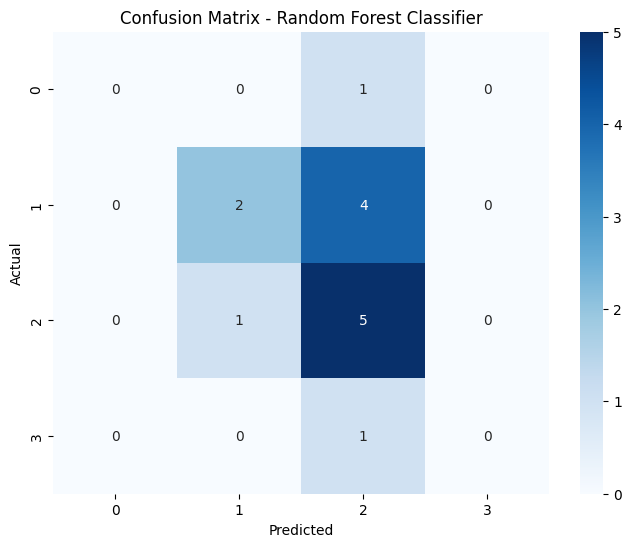

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


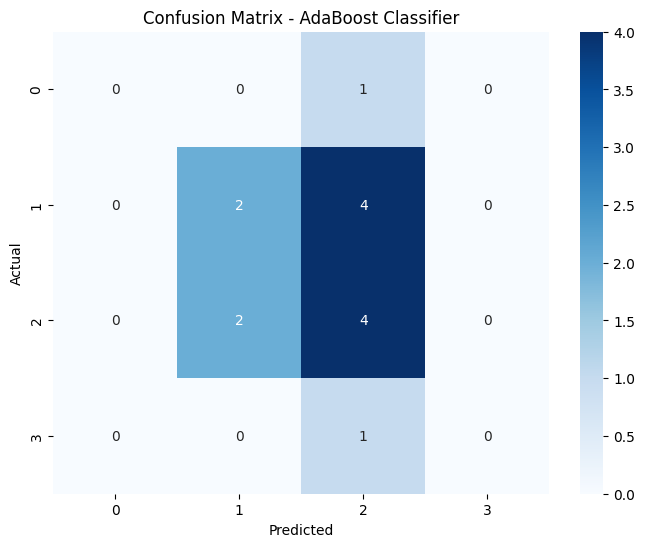

In [ ]:
# Plotting confusion matrix for AdaBoost Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(ab_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - AdaBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

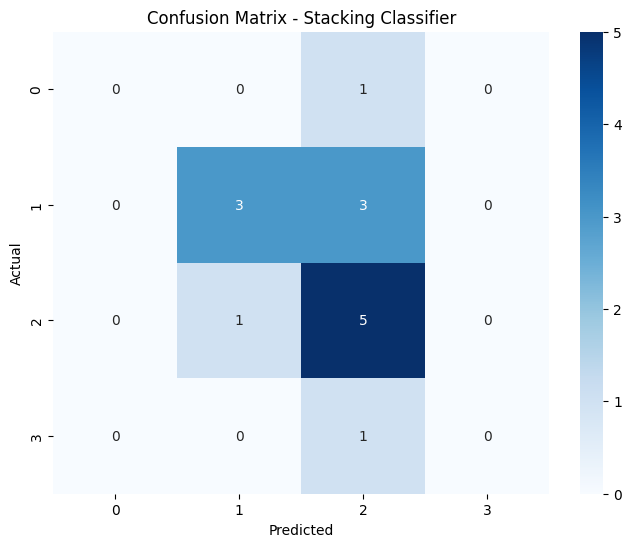

In [ ]:
# Plotting confusion matrix for Stacking Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(stacking_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Stacking Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import auc
import numpy as np

In [ ]:
#Roc curve in multiclass is difficult to plot
#so i use to plot confusion matrix

**Analysis**

you would need to compare the performance metrics of the individual models with the ensemble methods. Discuss the strengths and weaknesses of each approach based on these metrics. Explore potential improvements or modifications to the ensemble methods based on your observations.

Detailed Analysis

The goal of Airbnb’s marketing team in this exercise was to improve its users’ performance so it
could reap the benefits of ongoing host and renter fees. If the company’s hosts were not happy,
they were not likely to continue listing their properties through Airbnb, and in a competitive and
burgeoning marketplace, such attrition could be devastating.
Answer the following question:
1. What could the Airbnb marketing team offer to improve its users’ experience? Should it
rank properties it suggested to users based on some metric such as review sentiment?
How would review sentiment compare to summary-rating value in terms of its ability to
predict revenues?
2. Given what we know about the performance of properties in Miami and Paris, did Airbnb
need a region-specific strategy? Could the company suggest optimal pricing for hosts,

#Report

In [ ]:
'''

Airbnb, as the dataset in question, provides valuable insights into the performance of various models and ensemble methods for predicting user satisfaction and property revenue.
Through the analysis of performance metrics such as accuracy, precision, recall, and F1-score, we can assess the effectiveness of different machine learning approaches in this context.

1. Random Forest:
    Strengths: Robust to overfitting, can handle high-dimensional data, and resistant to noise.
   Weaknesses: Achieving low accuracy (0.5) suggests room for improvement, possibly due to inadequate hyperparameter tuning or feature engineering.
   Potential Improvements: Optimize hyperparameters and refine feature selection techniques to enhance model performance.

2. AdaBoost:
    Strengths: Effective in combining weak learners to create a strong classifier.
    Weaknesses: Low accuracy and F1-score (0.357 and 0.343, respectively) indicate suboptimal performance.
   Potential Improvements: Analyze misclassified instances, adjust learning rate, and experiment with different numbers of estimators.

3. Support Vector Classifier (SVC):
    Strengths: Effective in high-dimensional spaces and versatile with different kernel functions.
    Weaknesses: Low accuracy (0.5) suggests inadequate separation of classes in the dataset.
    Potential Improvements: Experiment with different kernel functions and tune hyperparameters for better performance.

4. Stacking (Ensemble Method):
    Strengths: Combines predictions of multiple models for improved performance.
    Weaknesses: While achieving the highest accuracy (0.571), performance still needs improvement.
    Potential Improvements: Explore different base models, adjust meta-classifier, and consider incorporating additional features for enhanced performance.

Improving user experience in Airbnb could involve implementing personalized ranking systems based on factors such as review sentiment, property ratings, location,
amenities, and pricing. A region-specific strategy may be necessary considering performance variations between locations like Miami and Paris. Additionally, offering
optimal pricing suggestions to hosts based on machine learning insights can maximize revenues while ensuring competitiveness in the market.

'''

'''Improving user experience in Airbnb could involve implementing personalized ranking systems based on factors such as review sentiment, property ratings, location,
amenities, and pricing. A region-specific strategy may be necessary considering performance variations between locations like Miami and Paris. Additionally, offering
optimal pricing suggestions to hosts based on machine learning insights can maximize revenues while ensuring competitiveness in the market. '''

Yes,
 Airbnb would benefit from a region-specific strategy considering performance variations between Miami and Paris. Tailoring offerings and pricing strategies to
 each region's unique characteristics can enhance user satisfaction and host revenue. By leveraging data-driven insights, Airbnb can suggest optimal pricing for hosts
 based on factors like property features, location, and market dynamics.